In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Problem 2, part c - stability region, part (b)

In [30]:
# Number of points for array initialization
N = 100
# Generate linear domain of w*dt values
wdts = np.linspace(0, 2, N)
# Generate A values from the coefficients
mag_a = np.array([1/36*wdt**6 - 1/12*wdt**4 + 1 for wdt in wdts])
mag_b = np.array([1/16*wdt**6 - 1/4*wdt**4 + 1 for wdt in wdts])

### Amplification factor plots

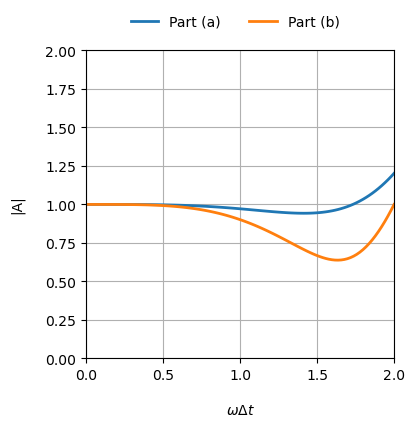

In [41]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(wdts, np.sqrt(mag_a), lw=2, label='Part (a)')
ax.plot(wdts, np.sqrt(mag_b), lw=2, label='Part (b)')

# Plot metadata
ax.set_aspect('equal')
ax.grid()
ax.set_xlabel('$\omega \Delta t$', labelpad=15)
ax.set_ylabel('|A|', labelpad=15)
ax.set_xlim([0, 2])
ax.set_ylim([0, 2])
x_pos = 0.5
fig.legend(ncol=2, frameon=False, loc='upper center', bbox_to_anchor=(x_pos, 1));

plt.savefig('figs/p2c.png')

### Relative phase error plots

In [38]:
# Number of points for array initialization
N = 100
# Generate linear domain of w*dt values
wdts = np.linspace(0, 2, N)
# Generate A values from the coefficients
rpe_a = np.array([(1/wdt*np.arctan((wdt - wdt**3/6)/(1 - wdt**2/2))) for wdt in wdts])
rpe_b = np.array([(1/wdt*np.arctan((wdt - wdt**3/4)/(1 - wdt**2/2))) for wdt in wdts])

/var/folders/98/_d8bjg_j2p58806pn5mtq77r0000gn/T/ipykernel_23792/3074374180.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  rpe_a = np.array([(1/wdt*np.arctan((wdt - wdt**3/6)/(1 - wdt**2/2))) for wdt in wdts])
/var/folders/98/_d8bjg_j2p58806pn5mtq77r0000gn/T/ipykernel_23792/3074374180.py:6: RuntimeWarning: invalid value encountered in double_scalars
  rpe_a = np.array([(1/wdt*np.arctan((wdt - wdt**3/6)/(1 - wdt**2/2))) for wdt in wdts])
/var/folders/98/_d8bjg_j2p58806pn5mtq77r0000gn/T/ipykernel_23792/3074374180.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  rpe_b = np.array([(1/wdt*np.arctan((wdt - wdt**3/4)/(1 - wdt**2/2))) for wdt in wdts])
/var/folders/98/_d8bjg_j2p58806pn5mtq77r0000gn/T/ipykernel_23792/3074374180.py:7: RuntimeWarning: invalid value encountered in double_scalars
  rpe_b = np.array([(1/wdt*np.arctan((wdt - wdt**3/4)/(1 - wdt**2/2))) for wdt in wdts])


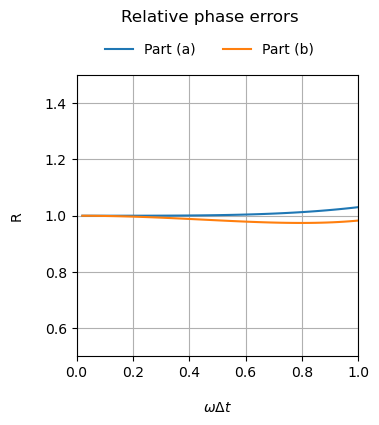

In [42]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(wdts, rpe_a, label='Part (a)')
ax.plot(wdts, rpe_b, label='Part (b)')

# Plot metadata
ax.set_aspect('equal')
ax.grid()
ax.set_xlabel('$\omega \Delta t$', labelpad=15)
ax.set_ylabel('R', labelpad=15)

x_pos = 0.55
ax.set_xlim([0, 1])
ax.set_ylim([0.5, 1.5])
fig.suptitle('Relative phase errors', x=x_pos, y=1.05)
fig.legend(ncol=2, frameon=False, loc='upper center', bbox_to_anchor=(x_pos, 1))

fig.tight_layout()
plt.savefig('figs/p2d.png')

### Problem 3: Lorenz equation discretization

This is ugly but it works

In [82]:
# Define functions
def F_x(x, y, z, t, r):
    return -3*(x - y)
def F_y(x, y, z, t, r):
    return -x*z + r*x - y
def F_z(x, y, z, t, r):
    return x*y - z

def diff_x(x, y, z, t, dt, r):
    a, b, c = 1, 1/2, 1
    xi_1 = x
    xi_2 = x + dt*a*F_x(x, y, z, t, r)
    x_ = x + dt*(b*F_x(xi_1, y, z, t + c*dt, r) + b*F_x(xi_2, y, z, t + c*dt, r))
    return x_
def diff_y(x, y, z, t, dt, r):
    a, b, c = 1, 1/2, 1
    xi_1 = y
    xi_2 = y + dt*a*F_y(x, y, z, t, r)
    y_ = y + dt*(b*F_y(x, xi_1, z, t + c*dt, r) + b*F_y(x, xi_2, z, t + c*dt, r))
    return y_
def diff_z(x, y, z, t, dt, r):
    a, b, c = 1, 1/2, 1
    xi_1 = z
    xi_2 = z + dt*a*F_z(x, y, z, t, r)
    z_ = z + dt*(b*F_z(x, y, xi_1, t + c*dt, r) + b*F_z(x, y, xi_2, t + c*dt, r))
    return z_

# Define initial values
r = 25
x_0, y_0, z_0 = 1, 1, 1
x = np.array([x_0])
y = np.array([y_0])
z = np.array([z_0])

# Define time and timestep
dt, t_0 = 0.01, 0
t = np.array([t_0])
N = 15000 # number of steps

for i in range(0, N):
    #print('Time step: {0} | Time: {1}'.format(i, t[i]))
    
    x_ = diff_x(x[i], y[i], z[i], t[i], dt, r)
    x = np.append(x, x_)
    
    y_ = diff_y(x[i], y[i], z[i], t[i], dt, r)
    y = np.append(y, y_)
    
    z_ = diff_z(x[i], y[i], z[i], t[i], dt, r)
    z = np.append(z, z_)
    
    # Step forward in time
    t = np.append(t, t[i] + dt)

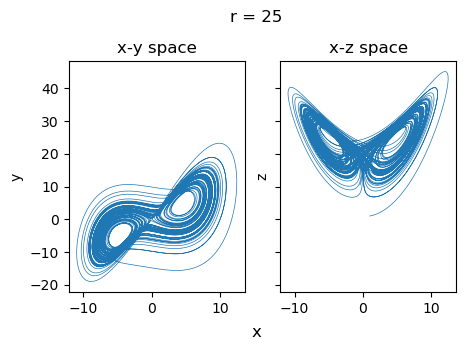

In [83]:
fig, ax = plt.subplots(figsize=(5, 3), ncols=2, sharey=True)
ax[0].plot(x, y, lw=0.5)
ax[1].plot(x, z, lw=0.5)
ax[0].set_title('x-y space')
ax[1].set_title('x-z space')
ax[0].set_ylabel('y')
ax[1].set_ylabel('z')
fig.supxlabel('x', y=-0.05)
fig.suptitle('r = 25', y=1.05)
plt.savefig('figs/p3_r25.png')

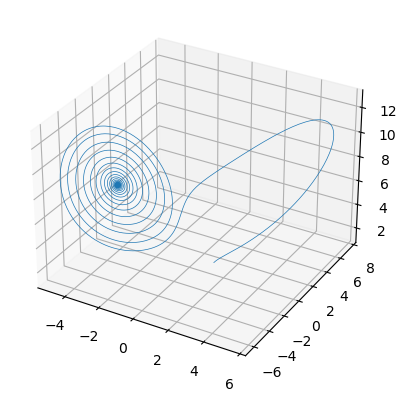

In [62]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(x, y, z, lw=0.5)
plt.savefig('figs/p3_r9a.png')